# Sam Fine Data Analyst Assignment Fitness22

# Task 1: Define the Challenge and Needed Data

### Process Outline:

The following is a plan to optimise ARPU (Average Revenue Per User) within the first 10 days of user download. The main objective is to increase revenue return from new customers. There will be a priority to increase the retention rate after the end of the trial period and therefore increasing total subscription purchases. 

----
### Project Structure and Steps:

1. **Understand the main objective:**
    - **Aim:** Increase ARPU in the first 10 days: 
  $$ARPU = \frac{Total\_Revenue}{Total\_Number\_of\_Users\_Downloaded}$$
    - Filter the above for all users where 10 days have passed since their app downlaod.
    - Break down revenue sources:
      - Direct: direct payments for subscriptions, (can we add more options?)
      - Indirect: Features or user experiences that increase retention and lead to direct payments
    - Identify the significance of the within 10 days time frame.
      
2. **Target Audience and User Segmentation:**
    - *High value cohort:* Identify top 20% of current users who generate 80% of short-term revenue.
        - Use SQL query on a table with user information and total revenue within first 10 days, and do analysis to identify possible groups.
    - Define different segments of population (defined in onbourding: goal, previous gym experience etc)
    - Plot baseline ARPU and retention rates for each segment for first 10 days after download. 
    - Define Target Audience 
     
3. **Create a user conversion funnel:**
    - Define conversion funnel to locate areas where users drop off
        $$Download → Onboarding → Trial → Subscription$$
    - Identify critical decision points to encourage conversion from trial to subscription.

4. **Brainstorm product or process improvements to define problems:**
    - Prioritise how to increase conversion from trial to subscription for the main objective
    - Identify changes that can increase revenue, retention and overall user experience.
    - Decide if more changes can be made to tailor for specific audience segments.
    - Main USP for app is personal workout customisations; discover more paths to achieving this.

5. **Prioritise top 3 recommendations:**:
    - Decide the top 3 improvements that have the most potential to achieve the main objective, and align with previous steps.
    - Design tests: Hypothesis test using tools like Amplitude or Python directly
    - Define key measurements: Identify key metrics and how data can be collected to measure them.

6. **Analyse results of tests:**
    - Validate the experiments: were there any errors or bias? Was there data quality issues?
    - Conclude if we have statistical and practical significance in our hypothesis tests. (p-value confidence intervals and lift values)

7. **Recommendations:**
    - Provide actionable insights based on the results of the experiments.
    - Present to non-technical and technical stakeholders.

Above, I have:
- Laid out the steps for the project
- Set priorities to be made as we progress
- Created a path from defining the problem to delivering actionable insights:

$$Problem\_Definition (1,2,3,4)→ Data\_Collection (5) → Analysis (6) → Insights (7) → Recommendations (7)$$

---

### Data Requirements:
**Key Metrics:**
- Total Revenue per user
- User funnel conversion values (aggregations of individual users):
    - App download to Registration confirmation
    - Registration confirmation to began initial onboarding
    - Initial onboarding began to initial onboarding complete
    - Initial onboarding complete to trial selection
    - Trial complete to subscription confirmed.    
**Note:** Another method to achieve the objective is to improve onboarding so more people initially pay for a subscription rather than the trial period, but I think the current set up is sufficient, and we will focus on the trial to subscription conversion.
- User segmentations based on the onboarding (goals, gym experience etc)
- Demographic data: age, gender
- Retention Rates: App usage per day for each user (active or not)
- Membership type: trial, monthly, yearly or any others we choose to add
- Workout data: workout durations, body area focus
- Individual Exercise Data: total duration, total sets, total reps, area of the body (can work out most populer exercises and muscle groups)

**Top 5 Events and Properties Sorted by Importance:**

1. **Event: membership_purchased**
- Properties: user_id, purchase_time, membership_type, total_payment, membership_duration
- Why it matters: Critical conversion point in user funnel. Direct revenue generation and the core ARPU component within 10-day window

2. **Event: trial_started**
- Properties: user_id, trial_start_time, trial_end_time, auto_renew_enabled
- Why it matters: this will be the main user segmentation to improve ARPU.

3. **Event: logon**
- Properties: user_id, time_logged_on, time_logged_off
- Why it matters: Can calculate retention rates

4. **Event: onboarding_complete**
- Properties: user_id, onboarding_complete (bool), goal, previous_gym_experience, current_consistency, workout_location, frequency_of_workouts_per_week, average_time_for_workout
- Why it matters:
  - Key segmentation metrics accumulated here.
  - Tailored product design or offers can be implemented to improve retention and ARPU.
    
5. **Event: exercise_completed**
- Properties: exercise_id, user_id, primary_muscle, secondary_muscle, total_duration, device_type (dumbells/machine), completed_all_sets(bool), total_sets, total_reps
- Why it matters:
  - Provides an engagement signal, workouts completed in early days correlate with retention and conversion.
  - Useful for targeted offers
  - Can identify the most popular exercises to prioritise to improve retention

--- 
### Collaboration plan: 
**Stakeholders:**
- **Product Team:**
  - Support: Discuss A/B testing, define new features and perform prioritisation
    - Communication:
      - Explain how features can improve core business question to increase revenue
      - Define A/B test structure.
      - Optimise length of time and total impact to decide prioritisation
  - Support: Current user convertion funnels
    - Communication:
      - Show my convertion funnel and compare to existing
      - Explain key events; membership_purchased, trial_started and discuss how they are important for improved ARPU
      - Discuss key drop-offs in funnel
  - Support: Customisation improvements:
    - Communication:
      - One of the main USPs is workout customisation, discuss how this can be improved (using my recommendations)
      - Explain how this increases retention and thus conversion to memberships and higher ARPU

- **Engineering Team:**
  - Support: Event tracking implementation
    - Communication:
      - Explain all events and discuss how to implement, via Amplitude or Python
      - Prioritise ease, current technologies and total time
      - Discuss constraints
  
- **Marketing Team:**
  - Support: Identify high-value customer segments
    - Communication:
      - Delve into campaign data for cohort analysis
      - Discuss which group contribute to the highest value (top 20%)
      - Produce tailored marketing strategies for chosen groups

- **Data Team:**
  - Support: Ensure data reliability
    - Communication:
      - Where and how can I access current and incoming data for my key metrics for improved ARPU?
      - Evaluate the cleanliness, reliabilty and the total available time frame for the existing data
      - Discuss data pipelines and architecture, prioritising efficiency and time
      - Review existing dashboards
  
- **Finance team:**
  - Support: Pricing Strategy
    - Communication:
      - Determine offers and changes to current subscriptions
      - For example: including a group membership at a discounted total individual price, to encourage more users and increase revenue for ARPU. 
  

| user_id | activation_start_date | activation_end_date | membership_type | total_payment | membership_duration | expired |
|---------|---------------------|-------------------|----------------|---------------|-------------------|---------|
| 1    | 2025-06-10          | 2025-06-17        | Trial          | 0.00          | 7                 | TRUE    |
| 2    | 2025-07-01          | 2025-08-01        | Monthly        | 50.00         | 31                | TRUE   |
| 2    | 2025-08-15          | 2025-09-15        | Monthly        | 50.00         | 31                | TRUE    |
| 3    | 2025-09-05          | 2026-09-05        | Yearly         | 500.00        | 365               | FALSE   |
| 2    | 2025-09-20          | 2025-10-20       | Monthly        | 50.00         | 30                | FALSE    |
| 4    | 2025-09-20          | 2025-09-27        | Trial          | 0.00          | 7                 | TRUE    |


| user_id | app_download_date      |
|---------|------------------------|
| 1    | 2025-06-10   |
| 2    | 2025-06-12     |
| 3    | 2025-09-05   |
| 4    | 2025-09-20   |



| user_id | time_active          | time_inactive        | activity_duration |
|---------|----------------------|----------------------|--------------------|
| 1       | 2025-01-10 08:15:30  | 2025-01-10 09:05:45  | 00:50:15           |
| 2       | 2025-01-11 10:05:00  | 2025-01-11 11:00:00  | 00:55:00           |
| 3       | 2025-01-12 13:20:10  | 2025-01-12 13:50:40  | 00:30:30           |
| 1       | 2025-01-13 07:45:15  | 2025-01-13 08:35:00  | 00:49:45           |
| 4       | 2025-01-14 19:10:00  | 2025-01-14 19:45:20  | 00:35:20           |
| 2       | 2025-01-15 09:20:00  | 2025-01-15 10:05:10  | 00:45:10           |
| 5       | 2025-01-16 18:00:00  | 2025-01-16 18:50:00  | 00:50:00           |
| 3       | 2025-01-17 12:10:30  | 2025-01-17 12:40:45  | 00:30:15           |


| exercise_id | user_id | primary_muscle | secondary_muscle | total_duration | device_type | completed_all_sets | total_sets | total_reps |
|-------------|---------|----------------|-------------------|---------------|-------------|----------------------|------------|------------|
| 101         | 1       | Chest          | Triceps           | 00:45:00      | Dumbbells   | TRUE                 | 4          | 40         |
| 102         | 2       | Back           | Biceps            | 00:50:00      | Machine     | TRUE                 | 5          | 50         |
| 103         | 3       | Legs           | Glutes            | 00:35:00      | Machine     | FALSE                | 3          | 30         |
| 104         | 1       | Shoulders      | Traps             | 00:40:00      | Dumbbells   | TRUE                 | 4          | 36         |
| 105         | 4       | Core           | Lower Back        | 00:30:00      | Dumbbells   | TRUE                 | 3          | 45         |
| 106         | 2       | Chest          | Triceps           | 00:55:00      | Machine     | FALSE                | 5          | 42         |
| 107         | 5       | Legs           | Calves            | 00:25:00      | Dumbbells   | TRUE                 | 2          | 24         |

# Task 2: From Plan to Execution 


## Execution of Steps:

### Step 1 Main Objective:
- Increase ARPU in the first 10 days after a user downloads the app.
- Focus on new customers from download to 10 days in the future
- Increase Revenue 

### Key Focus Area:
**Funnel analysis:** increase convertion from trial to subscription after end of trial (7 days)

---

## Step 2. User Segmentation

user_segmentation_table_example
| user_id | goal | previous_training_duration | current_consistency | workout_location | frequency_days_per_week | workout_length_minutes |how_they_heard_about_us |
|---|---|---|---|---|---|---|---|
| 1| lose weight | 1-6 months | on-and-off | commerical gym | 3 | 45-60 | instagram or facebook |
| 2| build muscle | 2+ years | train regulary | home gym | 5 | 60-75 | friend or family |
| 3| get in shape | less than a month | never  | bodyweight | 2 | 30-45  | tiktok |
| 4| build strength | 1-2 years | returning | small gym | 4 | 75-90  | google or youtube |

We can plot user retention and ARPU for each group and decide which segment to focus on for the e


| user_id | onboarding_complete |
|---------|----------------------|
| 1       | TRUE                 |
| 2       | TRUE                 |
| 3       | TRUE                 |
| 4       | TRUE                 |
| 5       | FALSE                |

## User Retention Example with Python

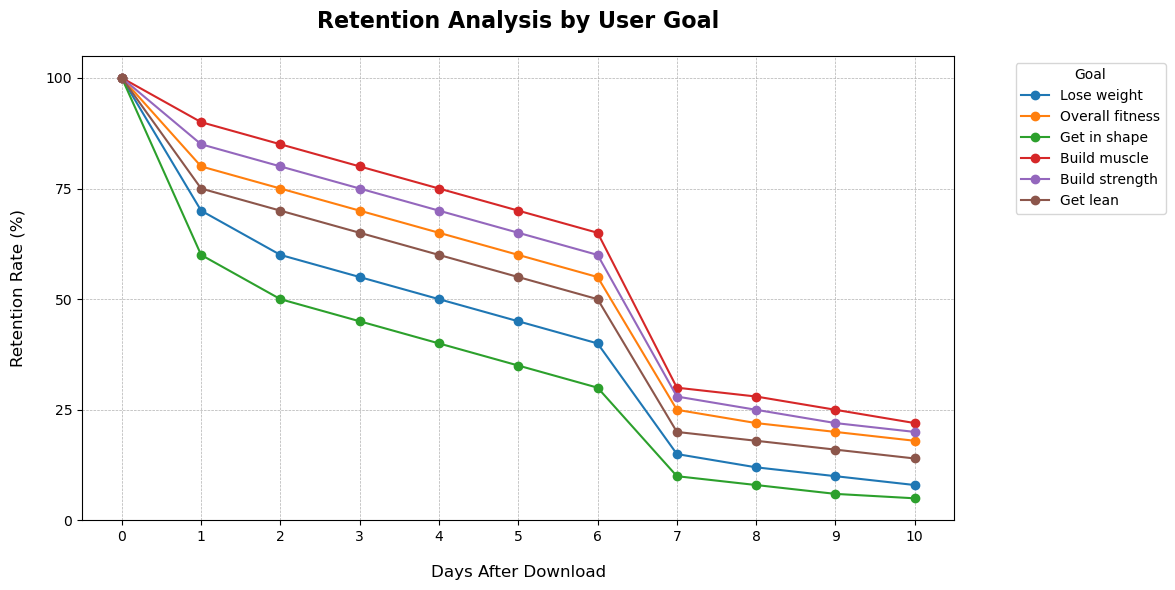

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define the user goals
goals = [
    'lose weight',
    'overall fitness',
    'get in shape',
    'build muscle',
    'build strength',
    'get lean'
]

# Test data
data = {
    'lose weight': [100, 70, 60, 55, 50, 45, 40, 15, 12, 10, 8],
    'overall fitness': [100, 80, 75, 70, 65, 60, 55, 25, 22, 20, 18],
    'get in shape': [100, 60, 50, 45, 40, 35, 30, 10, 8, 6, 5],
    'build muscle': [100, 90, 85, 80, 75, 70, 65, 30, 28, 25, 22],
    'build strength': [100, 85, 80, 75, 70, 65, 60, 28, 25, 22, 20],
    'get lean': [100, 75, 70, 65, 60, 55, 50, 20, 18, 16, 14]
}

# Create a DataFrame for easier plotting
df = pd.DataFrame(data)

# Plot the data
plt.figure(figsize=(12, 6))

# Iterate through each column (goal) and plot a line
for column in df.columns:
    plt.plot(df.index, df[column], marker='o', linestyle='-', label=column.capitalize())

# Axis
plt.title('Retention Analysis by User Goal', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Days After Download', fontsize=12, labelpad=15)
plt.ylabel('Retention Rate (%)', fontsize=12, labelpad=15)
plt.xticks(np.arange(0, 11))
plt.yticks(np.arange(0, 101, 25))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Legend
plt.legend(title='Goal', loc='upper right', bbox_to_anchor=(1.25, 1))

plt.ylim(0, 105)

# Display the plot
plt.tight_layout()
plt.show()

Above, we can see the cumulative retention curve per 'goal' segment .
  $$day\_n\_retention\_rate = \frac{active\_users\_on\_day\_n}{total\_downloads} \times 100$$

- A user is active on a day when they open the app.
- The main business objective involves increasing the retention rates for all segments, especially after the trial period ends on day 7, where we see a large decrease.
- We see above that the 'Get in Shape' group has the lowest retention rates, suggesting larger potential for improvements.
- The 'build muscle' group has the highest retention rates, suggesting they may be the easiest to convert to payments.
- Total population proportions need to be considered to decide if a group has enough participants to be focused on.
  

## ARPU SQL Calculation

Tables:  
- **membership_purchased**
  - Columns: user_id, purchase_time, membership_type, total_payment, membership_duration   
- **app_download**
  - Columns: user_id, app_download_time

SQL Query (PostgreSQL):
- INNER JOIN on user_id (all users should have app_download_time)
- Filter for rows with purchase_time within 10 days of app_download_time for each user
- SUM all total_payments and then divide by COUNT distinct user_id

-- app_download_time and that + 10 days need to be in date range. (need full first 10 days in range). activation_start_date needs to be within app_download_time and that + 10 days (as we want ARPU within first 10 days)
-- LEFT JOIN app_download to membership_activation on user_id (Left join as there may be users who downloaded but did not have a membership activated and we need total users downloaded)
-- filter for data in specificied date range (current - 30) or current > test_date and < 30 + test_date
-- cte to sum total payments per user (trial is 0) membership_activation
-- payment is made on activation_start_date

In [21]:
SELECT
    SUM(mp.total_payment)::float / COUNT(DISTINCT mp.user_id) as ARPU
FROM
    membership_purchased mp
INNER JOIN
    app_download ad
ON
    mp.user_id = ad.user_id
WHERE
    mp.purchase_time >= ad.app_download_time # probably wont occur but best practice
    AND mp.purchase_time <= (ad.app_download_time + INTERVAL '10 days');

IndentationError: unexpected indent (1183306586.py, line 2)

Data Filters:​

1. app_download_date and app_download_date + 10 days need to be in September 2025. ​
2. activation_start_date needs to be within app_download_date and app_download_date + 10
(payment is made on activation)​

​

SQL Strategy:​

- Create CTE containing app_download_plus_10_days from app_download.​

- Return data that satisfies data filter 1​

- LEFT JOIN this table with membership_activation on user_id (need all users who
downloaded even if no membership activation) ​

- Filter to satisfy data filter 2​

- SUM total_payments and divide by distinct user_ids (Use coalesce on the SUM to return 0 rather than NULL if all users have no payments)

In [1]:
-- postgreSQL
with download_10_day_period as (
    SELECT
        user_id,
        app_download_date,
        app_download_date + INTERVAL '10 days' AS download_date_plus_10
    FROM app_download
    WHERE EXTRACT(YEAR FROM app_download_date) = 2025
      AND EXTRACT(MONTH FROM app_download_date) = 9
      AND EXTRACT(YEAR FROM app_download_date + INTERVAL '10 days') = 2025
      AND EXTRACT(MONTH FROM app_download_date + INTERVAL '10 days') = 9
)

SELECT
    COALESCE(SUM(m.total_payment), 0)::numeric / COUNT(DISTINCT dp.user_id) AS ARPU
FROM download_10_day_period dp
LEFT JOIN membership_activation m
    ON dp.user_id = m.user_id
   AND m.activation_start_date BETWEEN dp.app_download_date AND dp.download_date_plus_10;

_IncompleteInputError: incomplete input (6408730.py, line 2)

test example

In [ ]:
-- postgreSQL
with download_10_day_period as (
    SELECT
        user_id,
        app_download_date,
        app_download_date + INTERVAL '10 days' AS download_date_plus_10
    FROM app_download
    WHERE app_download_date >= :test_start_date
      AND app_download_date <= :test_start_date + INTERVAL '20 days'
)
SELECT
    COALESCE(SUM(m.total_payment), 0)::numeric / COUNT(DISTINCT dp.user_id) AS ARPU
FROM download_10_day_period dp
LEFT JOIN membership_activation m
    ON dp.user_id = m.user_id
   AND m.activation_start_date BETWEEN dp.app_download_date AND dp.download_date_plus_10;

In [ ]:
-- postgreSQL
with download_10_day_period as (
    SELECT
        user_id,
        app_download_date,
        app_download_date + INTERVAL '10 days' AS download_date_plus_10
    FROM app_download
    WHERE EXTRACT(YEAR FROM app_download_date) = 2025
      AND EXTRACT(MONTH FROM app_download_date) = 9
      AND EXTRACT(YEAR FROM app_download_date + INTERVAL '10 days') = 2025
      AND EXTRACT(MONTH FROM app_download_date + INTERVAL '10 days') = 9
)

SELECT
    usd.goal,
    COUNT(DISTINCT dp.user_id) AS total_users,
    COALESCE(SUM(m.total_payment), 0) AS sum_of_payments,
    COALESCE(SUM(ma.total_payment), 0)::numeric / COUNT(DISTINCT dp.user_id) AS ARPU
FROM download_10_day_period dp
LEFT JOIN membership_activation ma
    ON dp.user_id = ma.user_id
   AND ma.activation_start_date BETWEEN dp.app_download_date AND dp.download_date_plus_10
LEFT JOIN user_segmentation_data usd
    ON dp.user_id = usd.user_id
GROUP BY usd.goal
ORDER BY ARPU DESC;


| goal           | total_users | sum of payments | ARPU |
|----------------|------------|----------------|------|
| build strength | 3          | 450            | 150  |
| build muscle   | 4          | 400            | 100  |
| NULL           | 4          | 280            | 70   |
| get in shape   | 5          | 200            | 40   |
| lose weight    | 6          | 150            | 25   |



In [1]:
# top 20% of users and what group they are in 
#user_segmentation_table_example (user_id, goal etc)
# we need within the first 10 days the total revenue per user (sum)
# return top 20% using ntile(5) and window function
#  group by eg goal, and sum all total payments, then divide by total users in each group to get ARPU

WITH total_rev_per_user_early AS (
    SELECT 
        mb.user_id,
        SUM(mb.total_payment) AS rev_per_user
    FROM membership_purchased mb
    INNER JOIN app_download ad
        ON mb.user_id = ad.user_id
    WHERE mb.purchase_time >= ad.app_download_time
      AND mb.purchase_time <= ad.app_download_time + INTERVAL '10 days'
    GROUP BY mb.user_id
),
top_20_percent AS (
    SELECT
        user_id,
        rev_per_user,
        NTILE(5) OVER (ORDER BY rev_per_user DESC) AS tile
    FROM total_rev_per_user_early
)
SELECT
    ust.goal,
    SUM(tp.rev_per_user)::numeric / COUNT(DISTINCT tp.user_id)::numeric AS ARPU
FROM top_20_percent tp
INNER JOIN user_segmentation_table_example ust
    ON tp.user_id = ust.user_id
WHERE tp.tile = 1   -- top 20%
GROUP BY ust.goal
ORDER BY ARPU DESC;


SyntaxError: invalid syntax. Perhaps you forgot a comma? (3134209263.py, line 8)

## Step 3. User Conversion Funnel (for customers initially choosing trial):

| Step | Funnel Stage Description              | Conversion Event                                    |
|------|----------------------------------------|----------------------------------------------------|
| 1️⃣   | App Download & Install         | app_download event triggered           |
| 2️⃣   | Registration on App                | User registers with email on app (registration_event)      |
| 3️⃣   | Initial Onboarding Began             | User begins onboarding |
| 4️⃣   | Initial Onboarding Complete       | user completes onboarding (onboarding_complete)|
| 5️⃣   | Trial Confirmed           | User chooses 7 day trial (trial_started) |
| 6️⃣   | Subscription Purchased           | User purchases a paid subscription (membership_activation) |

**Critical Conversion:** $5 →6$

## Step 4/5. Brainstorm Improvements (Top 3 are my Actionable Recommendations):

- **Team Memberships and leaderboards:**
    - Payment Options: 
      - option for group membership when multiple people sign up together (discount per individual)
      - Referral Link to 'Join my Team' where both get the 14 days free (already on app)
    - Create leaderboards and challenges for your 'team' (total weight lifted this week) (total time working out)
    - ARPU Impact: more people using the application leading to more subscriptions after trial period, and increase in revenue.
- **Specific achievements page for each 'goal' segment (or any chosen segment)**
    - lose weight: total weight lost
    - overall fitness: increased weight lifted and decrease in waist measurments (increase muscle mass while decreasing fat): 
    - get in shape: consistency metrics (build fitness from ground up)
    - build muscle: muscle size measurements and increase in weight lifted 
    - build strength: large increases in weight lifting
    - get lean: decrease in waist measurment with consistency in weight lifting
    - ARPU Impact: Specific achievements will motivate people to stay consistent and keep using the app, so more subscription extensions
- **Option for injury prevention in goals:**
    - Plans tailored for injury prevention
    - Example: lower back pain; majority of cases require rehab rather than surgery
    - ARPU Impact: Major market in injury prevention. (e.g. x% of lower back pain is curable with specific training)
- **Customise workout improvement:**
    - Begin with a custom workout where you select your favourite exercises and the maximum time you want your workout to last. The app now creates a whole workout around these chosen exercises.
    - ARPU Impact: Increases engagement and motivation as workouts more enjoyable, leading to higher conversion to payment.
- **Segmentation Tailored Statistics:**
    - Short statistics based off individual performance compared to segmentation
    - For example, if you complete your workout plan this month, you will be in the top 5% in your age category to complete over x total exercises.
    - ARPU Impact: positive statistics that encourage prolonged usage will improve retention rate
- **Verbal explanations:**
    - All exercises contain verbal explanations alongside visual and written (like in dumbell bench press/ chest fly machine)
    - ARPU Impact: Less confusion with exercises, especially for beginners so higher retention rate
- **Diet:**
    - Larger focus on diet as is a major contributer for health and fitness goals
    - There are a couple pages in 'train smart' including a link to a different app. Combine the apps.
    - ARPU Impact: Increase user retention as larger value for the app, so more subscriptions
- **Totorial:**
    - Add an interactice tutorial explaining how to use the main features in the app
    - ARPU Impact: Beginners will be less daunted by all the features, and retention rate will increase

General Points:
- Not begineer friendly
- Edit library to have less and better defined, customised workouts. Currently too many and not sure what the differences are
- Add more than 2 exercises to superset option. Add drop set option

## Step 6. Analysis: Implementation Plan
An A/B test will be performed for each of the actionable recommendations.  
**Note:** This can be implemented using Amplitude and tracking events, or directly in Python.  
I will give an example for Amplitude:
### Team Memberships and leaderboards A/B Test

#### Problem Statement:
**Business Goal:** Increase ARPU in first 10 days  
**Test Feature:** 'Team Membership' subscription option and leaderboard page for team
**Success Metric:** ARPU in first 10 days  
**Collaboration:** 
- Product: Decide what is on leaderboard page for team
- Design: Add Team Membership option to paywall page and add team page containing members
- Finance: Decide Team Membership price and how many per team 

---

#### Hypothesis Testing
**Hypothesis:** Team Membership Subscription option will increase trial-to-paid conversion, resulting in higher ARPU within the first 10 days after download.   
**H₀:** No impact on 10-day ARPU (μ_treatment = μ_control)    
**H₁:** Increase 10-day ARPU (μ_treatment > μ_control)  

**Example Statistical Metrics:**
- Significance Level: 95% confidence (α = 0.05)
- Minimum Detectable Effect: 5% relative ARPU increase

**Amplitude Experiment:**
- **Primary Metric:** ARPU in first 10 days
  - Revenue Event: membership_purchased
- **Secondary Metrics:**
  - Trial-to-paid conversion rate
  - Team formation rate
  - Daily active users (for retention rates)
- **Varients:**
  - Control Group (50%) - new users with no team membership option 
  - Varient Group (50%) - new users after test feature implemented
- **Allocation (Target Population):**
  - New users
  - Completed onboarding
  - Segmentation based on analysis. Example: goal = build_muscle
- **Decide Sample Size for each group**
- **Decide on Experiment Length:** example: 30 days to get enough new users
- **Launch experiment**

**Collaboration:** 
- Engineering:
  - implement relevant events:
      - team_joined: {user_id, team_id, member_count, timestamp}  
      - membership_purchased
      - trial_started
      - app_download
  - Add leaderboard page
- Data:
  - Validate event collection is working
  - add team membership to subscription options
  - Add leaderboard data

---
#### Validity Checks (Challenges and Mitigation)

**Pre-Launch Sanity Checks:**

- Equal sample sizes in control vs varient (50/50 split)
- No difference in baseline characteristics of each group (same goals/ age group etc)
- Event tracking functioning with no delay and quality data being produced - check with data team and check tables

**During Experiment:**

- Perform real-time monitoring: conversion rates, total team memberships, ARPU don't look abnormal - investigate with engineering if it does
- Monitor for external factors (social media craze, new gym openings)
- Ensure ratios for the groups are the same - change on amplitude if not
- Technical issues like data flow - data and engineering teams


---
#### Interpret Result:

You can use Amplitude's built in dashboards.  
#### Primary Metric Analysis (ARPU):
- Find ARPU for Control and Varient group
- Find Absolute and Relative lift

**Statistical Significance:**
- **P-value:**
    - If p-value <= 0.05 then significant
    - If p-value > 0.05 then not significant
- **Confidence Interval:**
    - Amplitude feature
    - If interval does not include 0, then significant
    - if interval includes 0, then not significant

**Practical Significance:**  
- Compare calculated relative effect to the relative Minimum Detectable Effect (MDE) of 5%.
- If higher then significant and if lower then not significant


#### Secondary Metrics Analysis:
**Trial-to-Paid Conversion Rate**
- Control: X% conversion rate
- Treatment: Y% conversion rate
- Check: Does this align with ARPU results?

**Team Formation Rate:**
- Varient Group: Z% of users joined a 'team'  
- Insight: Low percentage might explain limited ARPU impact

**Daily Active Users (Retention Rate Metric):**
- 10 day retention rate: Control vs Varient
- Has retention rate increased for the varient group

**Segment Analysis:**
- Break down results per segmented group

---
#### Launch Decision

#### **LAUNCH** if:

- **Primary metric (ARPU)** shows statistically significant improvement
- **Practical Significance:** Relative MDE >5%
- No negative impact on secondary metrics.
- Technical implementation is stable.

#### **DON'T LAUNCH** if:

- No **statistical significance** in primary metric.
- No **practical significance:** Relative MDE >5%
- **Confidence interval** includes zero or negative values.
- Negative impact on **user experience metrics**.
- **Technical issues** during the experiment.

--- 
**Note:** Tests can be performed for all actionable recommendations suggested.

## Communication and Delivery:
Can use Tableau or matplotlib     
Example Summary using data below:

**Overview:**
An analysis was performed to optimise ARPU (Average Revenue Per User) within the first 10 days of user download. The main objective was to increase revenue return from new customers. 

**Test Feature:** 'Team Membership' subscription option and leaderboard page for team

**Results:** 
- Team membership features increased ARPU by x% (practically significant)
- There was confirmation of statistical significance (p-value less than 0.05)
- Trial-to-Paid conversion increased by y%
- z% of new customers chose the 'Team Membership Subscription'
- A specific segment group showed strong adoption to the new subscription (do segment analysis)


**Recommendation:** 
- Full rollout to to highest performing segments
- Repeat experiment with more group segmentations

**Team Roles:**
- Product:
  - Decide what features should be added to leaderboard pages for 'teams'
- Engineering:
  - Monitor team feature stability
  - Add leaderboard features defined by product
  - Scale infrastructure for increased 'team' activity
- Data:
  - Track ARPU, conversion rates (trial to purchase) and rentention rates to confirm experiment result continues to be consistent
  - Generate weekly reports to show above
- Design:
  - Improve visuals for leaderboard pages
- Marketing:
    - Include team membership in marketing campaigns

Visualisation dashboard will contain:
- ARPU comparison for Control and Varient (Treatment) groups
- Relative and absolute lift
- Conversion funnel comparison for Control and Varient group (including trial to subscription conversion)
- User Segment Comparions for ARPU, Team formation (percentage of group with team subscription) and percentage of group with subscription bought.
- Retention Rate



| Team            | Responsibilities                                                                    |
| --------------- | ----------------------------------------------------------------------------------- |
| **Product**     | Define additional leaderboard features for “teams”.                                 |
| **Engineering** | Ensure feature stability, implement leaderboard enhancements, scale infrastructure. |
| **Data**        | Track ARPU, conversion & retention rates; generate weekly performance reports.      |
| **Design**      | Enhance leaderboard visual design.                                                  |
| **Marketing**   | Promote “Team Membership” in campaigns to boost adoption.                           |


In [36]:

summary_data = {
    'Metric': ['ARPU (10 days)', 'Trial-to-Paid Conversion', 'Team Formation Rate', 'Best Performing Segment'],
    'Control Group': ['$18.00', '12.0%', '', ''],
    'Treatment Group': ['$19.80', '15.0%', '32%', 'Build Muscle (+15% ARPU)'],
    'Improvement': ['+$1.80 (10%)', '+3%', 'New Feature', '+15% for target segment'],
    'Statistical Significance': ['Yes', '', '', ''],
    'Practically Significance': ['Yes', '', '', '']
}

print('Summary Table')
df_summary = pd.DataFrame(summary_data)
df_summary

Summary Table


,Metric,Control Group,Treatment Group,Improvement,Statistical Significance,Practically Significance
0,ARPU (10 days),$18.00,$19.80,+$1.80 (10%),Yes,Yes
1,Trial-to-Paid Conversion,12.0%,15.0%,+3%,,
2,Team Formation Rate,,32%,New Feature,,
3,Best Performing Segment,,Build Muscle (+15% ARPU),+15% for target segment,,


## Below is an example dashboard generated by LLM

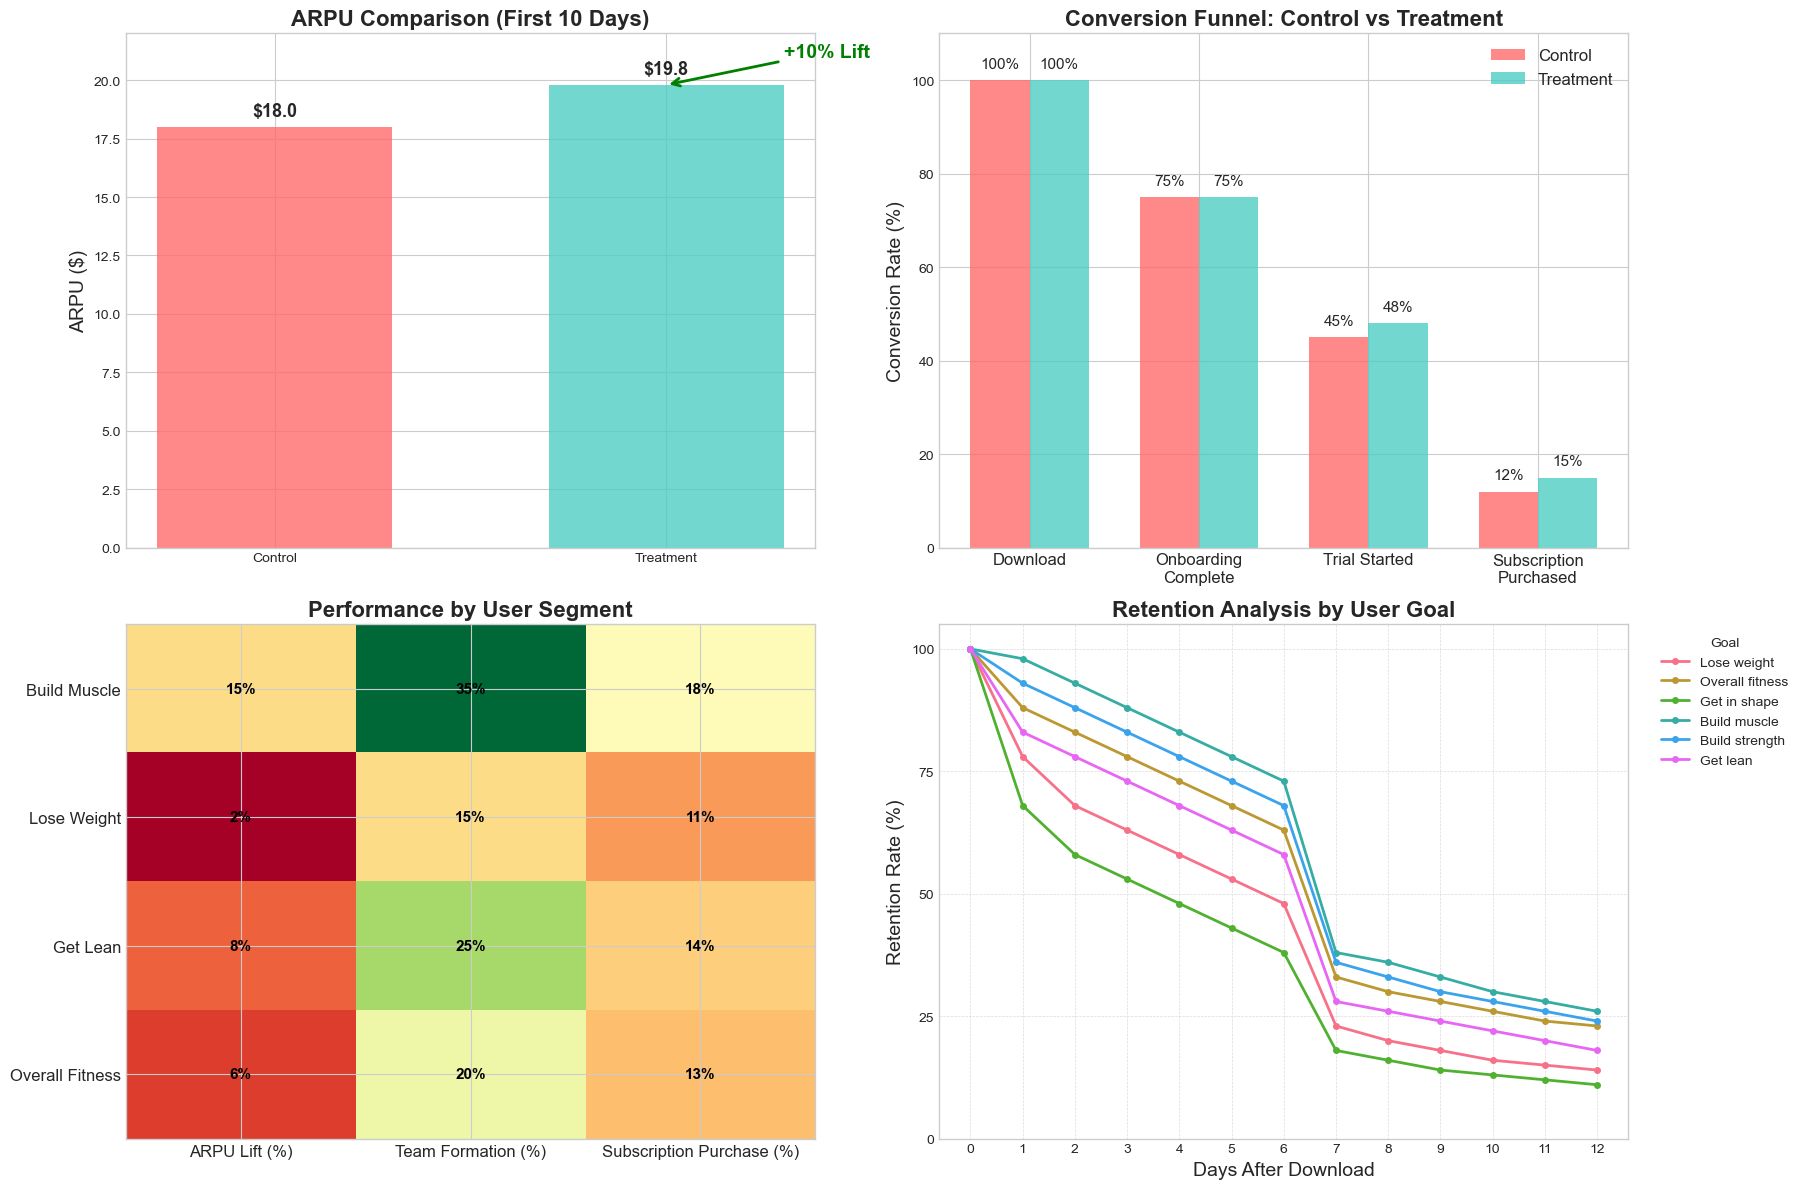

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set style for professional appearance
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Create figure with subplots
fig = plt.figure(figsize=(18, 12))

# 1. PRIMARY METRIC: ARPU Comparison Bar Chart
ax1 = plt.subplot(2, 2, 1)
groups = ['Control', 'Treatment']
arpu_values = [18.0, 19.8]  # Updated with larger absolute values
colors = ['#FF6B6B', '#4ECDC4']

bars = ax1.bar(groups, arpu_values, color=colors, alpha=0.8, width=0.6)
ax1.set_title('ARPU Comparison (First 10 Days)', fontsize=16, fontweight='bold')
ax1.set_ylabel('ARPU ($)', fontsize=14)
ax1.set_ylim(0, 22.0)

# Add value labels on bars
for bar, value in zip(bars, arpu_values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3, 
             f'${value:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=13)

# Add percentage increase annotation
ax1.annotate('+10% Lift', xy=(1, 19.8), xytext=(1.3, 21.0),
            arrowprops=dict(arrowstyle='->', color='green', lw=2),
            fontsize=14, color='green', fontweight='bold')

# 2. CONVERSION FUNNEL COMPARISON
ax2 = plt.subplot(2, 2, 2)
funnel_stages = ['Download', 'Onboarding\nComplete', 'Trial Started', 'Subscription\nPurchased']
control_rates = [100, 75, 45, 12]  # Percentages
treatment_rates = [100, 75, 48, 15]  # Higher conversion with team features

x = np.arange(len(funnel_stages))
width = 0.35

bars_c = ax2.bar(x - width/2, control_rates, width, label='Control', color='#FF6B6B', alpha=0.8)
bars_t = ax2.bar(x + width/2, treatment_rates, width, label='Treatment', color='#4ECDC4', alpha=0.8)

ax2.set_title('Conversion Funnel: Control vs Treatment', fontsize=16, fontweight='bold')
ax2.set_ylabel('Conversion Rate (%)', fontsize=14)
ax2.set_xticks(x)
ax2.set_xticklabels(funnel_stages, fontsize=12)
ax2.legend(fontsize=12)
ax2.set_ylim(0, 110)

# Add percentage labels
for bars in [bars_c, bars_t]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 2,
                f'{height:.0f}%', ha='center', va='bottom', fontsize=11)

# 3. SEGMENT PERFORMANCE HEATMAP
ax3 = plt.subplot(2, 2, 3)
segments = ['Build Muscle', 'Lose Weight', 'Get Lean', 'Overall Fitness']
metrics_seg = ['ARPU Lift (%)', 'Team Formation (%)', 'Subscription Purchase (%)']

# Mock performance data - updated with subscription purchase percentage
performance_data = np.array([
    [15, 35, 18],   # Build Muscle - highest subscription rate
    [2, 15, 11],    # Lose Weight  
    [8, 25, 14],    # Get Lean
    [6, 20, 13]     # Overall Fitness
])

im = ax3.imshow(performance_data, cmap='RdYlGn', aspect='auto')
ax3.set_xticks(range(len(metrics_seg)))
ax3.set_yticks(range(len(segments)))
ax3.set_xticklabels(metrics_seg, fontsize=12)
ax3.set_yticklabels(segments, fontsize=12)
ax3.set_title('Performance by User Segment', fontsize=16, fontweight='bold')

# Add text annotations
for i in range(len(segments)):
    for j in range(len(metrics_seg)):
        text = ax3.text(j, i, f'{performance_data[i, j]}%', 
                       ha="center", va="center", color="black", fontweight='bold', fontsize=11)

# 4. RETENTION ANALYSIS BY USER GOAL (Updated with better retention rates)
ax4 = plt.subplot(2, 2, 4)

# Define the user goals
goals = [
    'lose weight',
    'overall fitness', 
    'get in shape',
    'build muscle',
    'build strength',
    'get lean'
]

# Updated retention data with higher values following similar pattern
retention_data = {
    'lose weight': [100, 78, 68, 63, 58, 53, 48, 23, 20, 18, 16, 15, 14],
    'overall fitness': [100, 88, 83, 78, 73, 68, 63, 33, 30, 28, 26, 24, 23],
    'get in shape': [100, 68, 58, 53, 48, 43, 38, 18, 16, 14, 13, 12, 11],
    'build muscle': [100, 98, 93, 88, 83, 78, 73, 38, 36, 33, 30, 28, 26],
    'build strength': [100, 93, 88, 83, 78, 73, 68, 36, 33, 30, 28, 26, 24],
    'get lean': [100, 83, 78, 73, 68, 63, 58, 28, 26, 24, 22, 20, 18]
}

# Create DataFrame for easier plotting
df_retention = pd.DataFrame(retention_data)

# Plot retention lines
for column in df_retention.columns:
    ax4.plot(df_retention.index, df_retention[column], marker='o', linestyle='-', 
             label=column.capitalize(), linewidth=2, markersize=4)

ax4.set_title('Retention Analysis by User Goal', fontsize=16, fontweight='bold')
ax4.set_xlabel('Days After Download', fontsize=14)
ax4.set_ylabel('Retention Rate (%)', fontsize=14)
ax4.set_xticks(np.arange(0, 13))
ax4.set_yticks(np.arange(0, 101, 25))
ax4.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
ax4.legend(title='Goal', loc='upper right', bbox_to_anchor=(1.25, 1), fontsize=10)
ax4.set_ylim(0, 105)

plt.tight_layout()
plt.show()